# MultiVelo Fig6

Data for this figure can be found at the links below:

RNA: https://figshare.com/account/projects/164308/articles/22575376

ATAC: https://figshare.com/account/projects/164308/articles/22575370

If you do not download them manually, the notebook will do so automatically.

In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import sys
import multivelo as mv
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import requests

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

In [2]:
import time

mv.settings.LOG_FILENAME = "Fig6_" + str(time.time()) + ".txt"

In [3]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [4]:
rna_url = "https://figshare.com/ndownloader/files/40064350"
atac_url = "https://figshare.com/ndownloader/files/40064347"
  
rna_path = "human_brain_rna_after_filt_r2.h5ad"
atac_path = "human_brain_atac_gene_after_filt_r2.h5ad" 

In [5]:
adata_rna = sc.read(rna_path, backup_url=rna_url)
adata_atac = sc.read(atac_path, backup_url=atac_url)

  0%|          | 0.00/93.5M [00:00<?, ?B/s]

  0%|          | 0.00/45.5M [00:00<?, ?B/s]

## Running multi-omic dynamical model

MultiVelo incorporates chromatin accessibility information into RNA velocity and achieves better lineage predictions.

The detailed argument list can be shown with "help(mv.recover_dynamics_chrom)".

### WARNING:

The recover_dynamics_chrom() step can take a long time, even with parallelization. As such, we added a h5ad file to figshare containing the AnnData object returned by recover_dynamics_chrom(). In absence of a local h5ad file of the same name, a cell below the recover_dynamics_chrom() step will download it automatically using sc.read(). If you want to run this notebook in shorter amount of time, then you can run that cell first and skip the preprocessing done in the cells above it. However, if you want to run all cells, including the preprocessing steps, the notebook will write and save the h5ad file itself rather than downloading it from figshare.

recovering dynamics (using 1/10 cores)


  0%|          | 0/509 [00:00<?, ?gene/s]

    finished (0:04:53) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


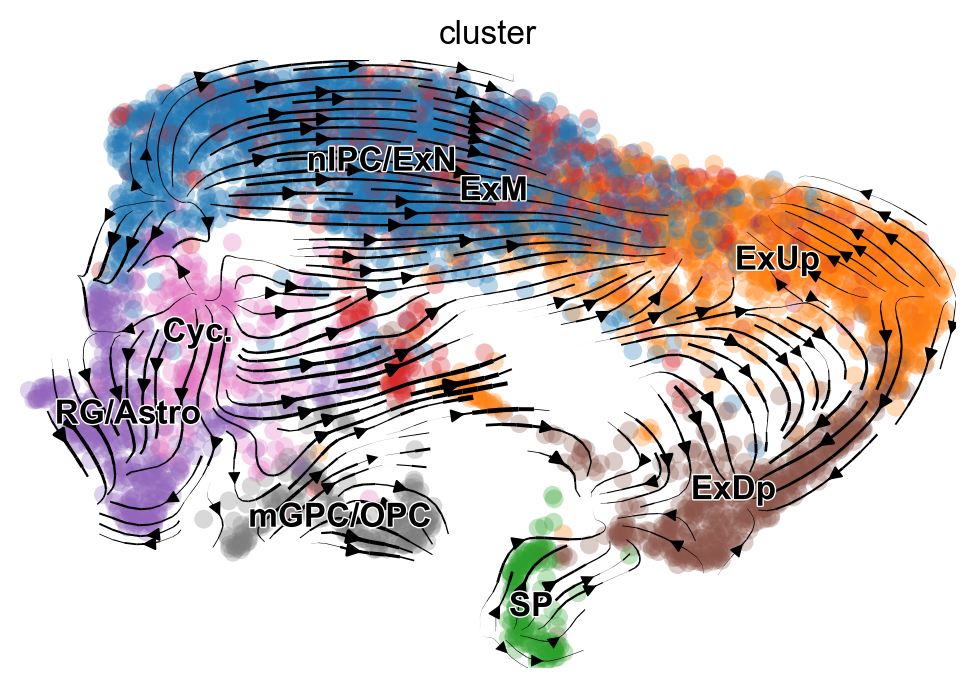

In [6]:
scv.tl.recover_dynamics(adata_rna)
scv.tl.velocity(adata_rna, mode="dynamical")
scv.tl.velocity_graph(adata_rna, n_jobs=1)
scv.tl.latent_time(adata_rna)
scv.pl.velocity_embedding_stream(adata_rna, basis='umap', color='cluster')

In [7]:
# This will take a while. Parallelization is high recommended.

adata_result = mv.recover_dynamics_chrom(adata_rna, 
                                        adata_atac,
                                        max_iter=5, 
                                        init_mode="invert",
                                        parallel=True,
                                        n_jobs = 15,
                                        save_plot=False,
                                        rna_only=False,
                                        fit=True,
                                        n_anchors=500, 
                                        extra_color_key='cluster'
                                        )

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


954 genes will be fitted

running 10 jobs in parallel



  0%|          | 0/954 [00:00<?, ?it/s]

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/umap_.py:662: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/umap_.py:662: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


ABLIM3 - low quality gene ABLIM3, skipping

ADAM28 - predicted partial trajectory: True

ADAM28 - predicted trajectory direction:on

ADAM28 - predicted model: 1

ADAM28 - initial params:
switch time array = [1. 2. 4.],
rates = [0.03519356 1.41551581 1.         0.21450416],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.4518539168449727

ADAM28 - initial loss: 0.15865798410189588

ADAM28 - removing gaps and realigning by 11.056552936304906..

ADAM28 - computing likelihood..

ADAM28 - likelihood of c: 0.2920886484436241, likelihood of u: 0.4095550397183778, likelihood of s: 0.0053888616325953875

ADAM28 - computing velocities..

ADAM28 - fitted params:
switch time array = [14.02229175 17.76621737 20.        ],
rates = [0.001      0.42887595 0.10250332 0.00266759],
cc scale = 1.1120370370370365,
c rescale factor = 1.5,
u rescale factor = 1.167289285182847

ADAM28 - aligning to range (0,20) by 1.126410835214447..

ADAM28 - final params:
switch time array = [15.79486136 20.012

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

ACHE - predicted partial trajectory: True

ACHE - predicted trajectory direction:on

ACHE - predicted model: 1

ACHE - initial params:
switch time array = [1. 2. 4.],
rates = [0.1371157  0.23549666 1.         0.37077074],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.8632309553383966

ACHE - initial loss: 0.0003271851352201523

ACHE - removing gaps and realigning by 4.887649248564947..

ACHE - computing likelihood..

ACHE - likelihood of c: 0.25456786582197927, likelihood of u: 0.04496683163747841, likelihood of s: 0.45404853985621696

ACHE - computing velocities..

ACHE - fitted params:
switch time array = [ 8.42223505 19.01597117 20.        ],
rates = [0.0242536  0.04615686 0.96009134 0.07443635],
cc scale = 1.0216020066930547,
c rescale factor = 0.8968335545856461,
u rescale factor = 1.5812870983862246

ACHE - aligning to range (0,20) by 1.0572033898305087..

ACHE - final params:
switch time array = [ 8.81926968 20.01900342 21.05932203],
rates = [0.02294128 0.04365939

cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.318847046513626

CENPF - initial loss: 0.04478250916416404

CENPF - removing gaps and realigning by 1.0..

CENPF - computing likelihood..

CENPF - likelihood of c: 0.12109010046296316, likelihood of u: 0.40738111442525615, likelihood of s: 0.4763165183775095

CENPF - computing velocities..

CENPF - fitted params:
switch time array = [0.69004867 7.89186513 8.09448173],
rates = [ 0.10889861 15.72745376  1.02565393  3.08300781],
cc scale = 1.1024926468249507,
c rescale factor = 0.8528732002851747,
u rescale factor = 0.36304245596433515

CENPF - aligning to range (0,20) by 1.6523178807947019..

CENPF - final params:
switch time array = [-1.19061779e+01 -6.48774961e-03  3.28299278e-01],
rates = [0.06590657 9.51841891 0.62073645 1.86586845],
cc scale = 1.1024926468249507,
c rescale factor = 0.8528732002851747,
u rescale factor = 0.36304245596433515

CENPF - final loss: 0.031618771326648136

CENPF - final likelihood: 0.0234966081491

ABLIM1 - predicted partial trajectory: False

ABLIM1 - predicted trajectory direction:complete

ABLIM1 - predicted model: 1

ABLIM1 - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.19000164 0.88145863 1.         1.98375816],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5041927237420675

ABLIM1 - initial loss: 0.0004168624319007157

ABLIM1 - removing gaps and realigning by 1.5103716000939063..

ABLIM1 - computing likelihood..

ABLIM1 - likelihood of c: 0.35321425025862485, likelihood of u: 0.7342712042426259, likelihood of s: 0.6652898341856629

ABLIM1 - computing velocities..

ABLIM1 - fitted params:
switch time array = [ 0.60055098  5.44283485 14.16517672],
rates = [0.13490537 0.58387027 0.69764732 1.45549831],
cc scale = 1.2943583580188203,
c rescale factor = 1.1605489153864539,
u rescale factor = 0.5218970824382094

ABLIM1 - aligning to range (0,20) by 1.0..

ABLIM1 - final params:
switch time array = [ 0.60055098  5.44283485 14.16

A2M - predicted partial trajectory: True

A2M - predicted trajectory direction:on

A2M - predicted model: 1

A2M - initial params:
switch time array = [1. 2. 4.],
rates = [0.03156224 7.63041573 1.         0.68097869],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7003798335360534

A2M - initial loss: 0.5936826594448812

A2M - removing gaps and realigning by 9.058859670638121..

A2M - computing likelihood..

A2M - likelihood of c: 0.4189168217003997, likelihood of u: 0.16325934195675595, likelihood of s: 0.11804203931493408

A2M - computing velocities..

A2M - fitted params:
switch time array = [12.41497341 18.18548445 20.        ],
rates = [1.00000000e-03 1.45660780e+00 3.42314201e-01 2.27361854e-02],
cc scale = 0.25,
c rescale factor = 1.5,
u rescale factor = 1.174909511782014

A2M - aligning to range (0,20) by 1.1015452538631347..

A2M - final params:
switch time array = [13.67565504 20.03213408 22.03090508],
rates = [9.07815631e-04 1.32233133e+00 3.10758183e-01 2.0640

ABHD3 - predicted partial trajectory: False

ABHD3 - predicted trajectory direction:complete

ABHD3 - predicted model: 1

ABHD3 - initial params:
switch time array = [3.         4.         7.66249719],
rates = [0.07378043 0.34677192 1.         0.95240667],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.9216180983689435

ABHD3 - initial loss: 0.0002329034669735158

ABHD3 - removing gaps and realigning by 1.453577883932606..

ABHD3 - computing likelihood..

ABHD3 - likelihood of c: 0.2672514205526983, likelihood of u: 0.49260249075701756, likelihood of s: 0.36396136617664926

ABHD3 - computing velocities..

ABHD3 - fitted params:
switch time array = [ 6.6484855  10.25719105 11.75969762],
rates = [0.03090147 0.29701735 0.3186074  0.65521544],
cc scale = 0.8599420675823821,
c rescale factor = 0.9396615879524021,
u rescale factor = 0.5461200178950063

ABHD3 - aligning to range (0,20) by 1.0..

ABHD3 - final params:
switch time array = [ 6.6484855  10.25719105 11.75969762],
rat

ABTB2 - predicted partial trajectory: True

ABTB2 - predicted trajectory direction:on

ABTB2 - predicted model: 1

ABTB2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.21700282 0.14246611 1.         0.83484748],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5129205218821725

ABTB2 - initial loss: 7.313182588838375e-05

ABTB2 - removing gaps and realigning by 5.132259795780574..

ABTB2 - computing likelihood..

ABTB2 - likelihood of c: 0.23205149842671033, likelihood of u: 0.23089406619160127, likelihood of s: 0.4989651326634111

ABTB2 - computing velocities..

ABTB2 - fitted params:
switch time array = [10.78982959 18.94397452 20.        ],
rates = [0.04176978 0.03127562 0.39891896 0.13720563],
cc scale = 0.6661800403000159,
c rescale factor = 0.8070461340652264,
u rescale factor = 0.8693261868320625

ABTB2 - aligning to range (0,20) by 1.0572033898305087..

ABTB2 - final params:
switch time array = [11.40704441 20.02763408 21.1440678 ],
rates = [0.03950969

AGBL4 - predicted partial trajectory: True

AGBL4 - predicted trajectory direction:on

AGBL4 - predicted model: 1

AGBL4 - initial params:
switch time array = [1. 2. 4.],
rates = [0.17983543 0.07347253 1.         0.6506145 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5331704024109706

AGBL4 - initial loss: 2.4887116844706708e-05

AGBL4 - removing gaps and realigning by 6.649640216885196..

AGBL4 - computing likelihood..

AGBL4 - likelihood of c: 0.19950821943160707, likelihood of u: 0.1534183801600582, likelihood of s: 0.5302033114062558

AGBL4 - computing velocities..

AGBL4 - fitted params:
switch time array = [ 9.05060892 18.66480213 20.        ],
rates = [0.02894187 0.01117751 0.63422467 0.06375857],
cc scale = 0.5945162901775006,
c rescale factor = 0.8191140794559331,
u rescale factor = 1.8415974524466958

AGBL4 - aligning to range (0,20) by 1.0731182795698926..

AGBL4 - final params:
switch time array = [ 9.71237388 20.02954035 21.46236559],
rates = [0.02696988

ABCC9 - predicted partial trajectory: True

ABCC9 - predicted trajectory direction:on

ABCC9 - predicted model: 1

ABCC9 - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.14981009 0.33776508 1.         1.68079068],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.25004080055333866

ABCC9 - initial loss: 6.94001805175615e-05

ABCC9 - removing gaps and realigning by 2.9876046471952264..

ABCC9 - computing likelihood..

ABCC9 - likelihood of c: 0.12680975010454842, likelihood of u: 0.11677194740825898, likelihood of s: 0.1954533428510414

ABCC9 - computing velocities..

ABCC9 - fitted params:
switch time array = [ 2.99329407 11.8854889  20.        ],
rates = [0.07164623 0.09330246 0.35010993 0.44683071],
cc scale = 1.0788229771793554,
c rescale factor = 0.782940816703386,
u rescale factor = 0.4015780481069311

ABCC9 - aligning to range (0,20) by 1.6858108108108107..

ABCC9 - final params:
switch time array = [ 5.04612751 20.03668567 33.716216

ALCAM - predicted partial trajectory: False

ALCAM - predicted trajectory direction:complete

ALCAM - predicted model: 1

ALCAM - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.21688168 0.24771574 1.         1.04526915],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.8274254010585886

ALCAM - initial loss: 0.0002057594121452045

ALCAM - removing gaps and realigning by 1.3449400929704722..

ALCAM - computing likelihood..

ALCAM - likelihood of c: 0.2234197048821876, likelihood of u: 0.3458799336915911, likelihood of s: 0.38323874265543834

ALCAM - computing velocities..

ALCAM - fitted params:
switch time array = [ 1.46122137  6.38220346 10.76540316],
rates = [0.150507   0.18447126 0.74101498 0.7771864 ],
cc scale = 0.6848363047356143,
c rescale factor = 1.0949589888623577,
u rescale factor = 0.8280328803134909

ALCAM - aligning to range (0,20) by 1.0..

ALCAM - final params:
switch time array = [ 1.46122137  6.38220346 10.76540316],
rat

ABCG2 - predicted partial trajectory: True

ABCG2 - predicted trajectory direction:on

ABCG2 - predicted model: 1

ABCG2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.09347588 1.85882461 1.         0.52962609],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.2

ABCG2 - initial loss: 0.31150659645290263

ABCG2 - removing gaps and realigning by 5.297059884171969..

ABCG2 - computing likelihood..

ABCG2 - likelihood of c: 0.2113956511583909, likelihood of u: 0.39883224611279433, likelihood of s: 0.25701919880825863

ABCG2 - computing velocities..

ABCG2 - fitted params:
switch time array = [11.03043601 18.92791771 20.        ],
rates = [0.00160097 0.40081379 0.18475743 0.08311246],
cc scale = 0.6771228574964012,
c rescale factor = 1.5,
u rescale factor = 0.38049310234700867

ABCG2 - aligning to range (0,20) by 1.0572033898305087..

ABCG2 - final params:
switch time array = [11.66141434 20.01065877 21.1440678 ],
rates = [0.00151434 0.37912647 0.17476053 0.078615

CIT - predicted partial trajectory: False

CIT - predicted trajectory direction:complete

CIT - predicted model: 1

CIT - initial params:
switch time array = [ 5.          6.         11.90775528],
rates = [0.05752944 0.22046453 1.         1.1786163 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.826309261922258

CIT - initial loss: 4.35537230217132e-05

CIT - removing gaps and realigning by 1.0058327645886762..

CIT - computing likelihood..

CIT - likelihood of c: 0.18943815662995167, likelihood of u: 0.2984127317097191, likelihood of s: 0.31626763684804154

CIT - computing velocities..

CIT - fitted params:
switch time array = [ 6.37630772  7.13136782 12.32494146],
rates = [0.06656101 0.20952818 0.99261232 1.23037065],
cc scale = 1.1717183884341453,
c rescale factor = 1.021221938707026,
u rescale factor = 0.8712555900035199

CIT - aligning to range (0,20) by 1.0..

CIT - final params:
switch time array = [ 6.37630772  7.13136782 12.32494146],
rates = [0.06656101 0.2095

CNKSR3 - final params:
switch time array = [ 5.45057768  6.30916019 16.66016076],
rates = [0.09152252 0.56289147 0.90174788 1.03494945],
cc scale = 1.3142127953665237,
c rescale factor = 0.9273624220043282,
u rescale factor = 0.6943488340338724

CNKSR3 - final loss: 0.0019044742592193387

CNKSR3 - final likelihood: 0.05003010787870441

CNTNAP5 - predicted partial trajectory: False

CNTNAP5 - predicted trajectory direction:complete

CNTNAP5 - predicted model: 1

CNTNAP5 - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.13353524 0.60920488 1.         1.26031227],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7728185072403241

CNTNAP5 - initial loss: 0.0005315266157324867

CNTNAP5 - removing gaps and realigning by 2.008651982227712..

CNTNAP5 - computing likelihood..

CNTNAP5 - likelihood of c: 0.15055554494723608, likelihood of u: 0.4610953141393774, likelihood of s: 0.39006003784523374

CNTNAP5 - computing velocities..

CNTNAP5 - fitted 

CNTN4 - final params:
switch time array = [ 2.56559443  8.49442669 42.77683136],
rates = [0.08398823 0.50723688 0.48416248 0.97898135],
cc scale = 0.977029670319309,
c rescale factor = 1.026753561756669,
u rescale factor = 0.49504306600313763

CNTN4 - final loss: 0.00033627348214487583

CNTN4 - final likelihood: 0.1193943234975594

COL15A1 - predicted partial trajectory: True

COL15A1 - predicted trajectory direction:on

COL15A1 - predicted model: 1

COL15A1 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.06128114 0.52382201 1.         2.44937332],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.34159868166040064

COL15A1 - initial loss: 0.00013086916622588466

COL15A1 - removing gaps and realigning by 1.9991817343631146..

COL15A1 - computing likelihood..

COL15A1 - likelihood of c: 0.18287019495710063, likelihood of u: 0.42774366598055424, likelihood of s: 0.530267312982613

COL15A1 - computing velocities..

COL15A1 - fitted params:
s

CRYAB - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.08834403 2.64241247 1.         1.61714396],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5807005994224981

CRYAB - initial loss: 0.02594596341452355

CRYAB - removing gaps and realigning by 1.0..

CRYAB - computing likelihood..

CRYAB - likelihood of c: 0.15779387956588523, likelihood of u: 0.24754927902753782, likelihood of s: 0.34594920459674144

CRYAB - computing velocities..

CRYAB - fitted params:
switch time array = [3.41150624 9.18665236 9.523285  ],
rates = [0.13680706 3.68818742 0.86412658 1.06320777],
cc scale = 1.1173854884924013,
c rescale factor = 0.8981808534824619,
u rescale factor = 0.6469608898978445

CRYAB - aligning to range (0,20) by 2.096638655462185..

CRYAB - final params:
switch time array = [ 7.15269585 19.26109046 19.96688745],
rates = [0.06525066 1.7590954  0.41214855 0.5071011 ],
cc scale = 1.1173854884924013,
c rescale factor = 0.8981808534824619,
u re

CSMD3 - final params:
switch time array = [ 3.8671755   4.12981406 15.39033352],
rates = [0.03034992 0.78090898 0.58441714 0.83015611],
cc scale = 2.045639236079026,
c rescale factor = 1.1992004369777356,
u rescale factor = 0.5848520734949454

CSMD3 - final loss: 0.00015538525679148927

CSMD3 - final likelihood: 0.14601916532762751

DACH1 - predicted partial trajectory: True

DACH1 - predicted trajectory direction:on

DACH1 - predicted model: 1

DACH1 - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.11710804 0.54385531 1.         1.71949972],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.49456371563137197

DACH1 - initial loss: 0.0003272139899308711

DACH1 - removing gaps and realigning by 2.5172267532564017..

DACH1 - computing likelihood..

DACH1 - likelihood of c: 0.27580755949894303, likelihood of u: 0.5865099250819537, likelihood of s: 0.645373210150553

DACH1 - computing velocities..

DACH1 - fitted params:
switch time array = [ 

COBLL1 - predicted trajectory direction:on

COBLL1 - predicted model: 1

COBLL1 - initial params:
switch time array = [1. 2. 4.],
rates = [0.15546979 0.16461987 1.         0.4128119 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.2886884045718081

COBLL1 - initial loss: 0.017431059667205012

COBLL1 - removing gaps and realigning by 7.7944310251614155..

COBLL1 - computing likelihood..

COBLL1 - likelihood of c: 0.15247516394824928, likelihood of u: 0.2967532417040018, likelihood of s: 0.5841391979116733

COBLL1 - computing velocities..

COBLL1 - fitted params:
switch time array = [ 9.02660703 18.4389236  20.        ],
rates = [0.01109676 0.03445805 0.17640983 0.03930753],
cc scale = 0.7959157913302921,
c rescale factor = 1.255141108601319,
u rescale factor = 0.5566062259099556

COBLL1 - aligning to range (0,20) by 1.0847826086956522..

COBLL1 - final params:
switch time array = [ 9.79190632 20.00222365 21.69565217],
rates = [0.01022948 0.03176493 0.16262228 0.03623539],

CRY1 - final params:
switch time array = [ 1.16056965  1.69334228 30.56464112],
rates = [0.16877912 0.50784636 0.50359578 0.51937857],
cc scale = 0.7822185327008013,
c rescale factor = 1.0251283196793217,
u rescale factor = 0.6910111286984872

CRY1 - final loss: 0.0013741055686913842

CRY1 - final likelihood: 0.0373087549925461

CX3CR1 - low quality gene CX3CR1, skipping

DCN - predicted partial trajectory: True

DCN - predicted trajectory direction:on

DCN - predicted model: 1

DCN - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.07875632 1.0549214  1.         1.5561641 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.2706054722688955

DCN - initial loss: 0.027407505498179146

DCN - removing gaps and realigning by 2.391384546231079..

DCN - computing likelihood..

DCN - likelihood of c: 0.22876561167414314, likelihood of u: 0.04587463777485396, likelihood of s: 0.1653864709754848

DCN - computing velocities..

DCN - fitted params:
swi

COL4A1 - final params:
switch time array = [ 7.7604256  20.04321857 21.49779736],
rates = [0.01182077 0.05743839 0.41701196 0.05066228],
cc scale = 0.8232055098651994,
c rescale factor = 1.0235932522048905,
u rescale factor = 1.3200773603924683

COL4A1 - final loss: 0.0003476594429021664

COL4A1 - final likelihood: 0.03599495143224838

CREB5 - predicted partial trajectory: False

CREB5 - predicted trajectory direction:complete

CREB5 - predicted model: 1

CREB5 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.1383528  0.45229624 1.         1.33455344],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6181383156535647

CREB5 - initial loss: 0.0008484674880212347

CREB5 - removing gaps and realigning by 1.0177048299767022..

CREB5 - computing likelihood..

CREB5 - likelihood of c: 0.3031642696094641, likelihood of u: 0.573875704461356, likelihood of s: 0.704091465737751

CREB5 - computing velocities..

CREB5 - fitted params:
switch time arr

CRADD - final params:
switch time array = [ 1.66442148  3.17807311 39.18251333],
rates = [0.11317639 0.08127024 0.19051441 0.14673149],
cc scale = 0.9330686135287714,
c rescale factor = 0.8630590383070584,
u rescale factor = 0.4349236163836294

CRADD - final loss: 3.9879034196973224e-05

CRADD - final likelihood: 0.005031968868684046

CTSB - predicted partial trajectory: True

CTSB - predicted trajectory direction:on

CTSB - predicted model: 1

CTSB - initial params:
switch time array = [1. 2. 4.],
rates = [0.13980407 0.44561494 1.         0.66235956],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.48108965632052264

CTSB - initial loss: 0.016794448002101472

CTSB - removing gaps and realigning by 7.772978959449354..

CTSB - computing likelihood..

CTSB - likelihood of c: 0.20861365849476568, likelihood of u: 0.36578098200076115, likelihood of s: 0.654994120509301

CTSB - computing velocities..

CTSB - fitted params:
switch time array = [ 9.58214316 18.44368811 20.       

CSMD2 - final loss: 0.0019851302915175595

CSMD2 - final likelihood: 0.10216743998014917

CTSS - low quality gene CTSS, skipping

CYTIP - low quality gene CYTIP, skipping

DCDC2 - low quality gene DCDC2, skipping

DCLK2 - predicted partial trajectory: False

DCLK2 - predicted trajectory direction:complete

DCLK2 - predicted model: 1

DCLK2 - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.11119349 2.06966742 1.         1.37676942],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6600391290747092

DCLK2 - initial loss: 0.012563008306443847

DCLK2 - removing gaps and realigning by 1.570870758064625..

DCLK2 - computing likelihood..

DCLK2 - likelihood of c: 0.3171339368094025, likelihood of u: 0.5637494703554448, likelihood of s: 0.47495919598430947

DCLK2 - computing velocities..

DCLK2 - fitted params:
switch time array = [ 1.67470869  9.40522314 12.89487534],
rates = [0.06299431 1.26081327 0.63658961 1.17668528],
cc scale = 0.96948078071

FMN1 - low quality gene FMN1, skipping

FOXP1 - predicted partial trajectory: False

FOXP1 - predicted trajectory direction:complete

FOXP1 - predicted model: 1

FOXP1 - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.21705079 0.80248342 1.         1.42681522],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6851493516002446

FOXP1 - initial loss: 0.00322626358479341

FOXP1 - removing gaps and realigning by 1.2933908466553818..

FOXP1 - computing likelihood..

FOXP1 - likelihood of c: 0.22800847286645046, likelihood of u: 0.8101438523101352, likelihood of s: 0.5721097083419712

FOXP1 - computing velocities..

FOXP1 - fitted params:
switch time array = [ 1.55733239  9.10360039 10.10530289],
rates = [0.13326457 0.6770172  0.73244711 1.33736564],
cc scale = 1.4854066590975132,
c rescale factor = 0.9652874181527287,
u rescale factor = 0.6630768385269216

FOXP1 - aligning to range (0,20) by 1.0..

FOXP1 - final params:
switch time array = [ 1.

GAB1 - final params:
switch time array = [ 5.6605379  20.00675906 21.98237885],
rates = [0.04535003 0.15970778 0.20604589 0.58160359],
cc scale = 0.9441935763146514,
c rescale factor = 0.9776427119629101,
u rescale factor = 0.29679960385825976

GAB1 - final loss: 0.0006129421996411526

GAB1 - final likelihood: 0.04363221757833435

GADD45B - low quality gene GADD45B, skipping

GALNT17 - predicted partial trajectory: False

GALNT17 - predicted trajectory direction:complete

GALNT17 - predicted model: 1

GALNT17 - initial params:
switch time array = [1. 2. 4.],
rates = [0.12256103 0.16339167 1.         0.78066224],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7151273349062268

GALNT17 - initial loss: 2.3453628697700803e-05

GALNT17 - removing gaps and realigning by 2.4682245236524287..

GALNT17 - computing likelihood..

GALNT17 - likelihood of c: 0.21471964293001156, likelihood of u: 0.296674029963887, likelihood of s: 0.21307926531922997

GALNT17 - computing velocities..


FOXO1 - fitted params:
switch time array = [ 6.7321538  18.90703002 20.        ],
rates = [0.04346239 0.03309053 0.26436551 0.16000839],
cc scale = 0.6174649905167233,
c rescale factor = 0.7593491249515466,
u rescale factor = 0.5042352743866976

FOXO1 - aligning to range (0,20) by 1.0662393162393162..

FOXO1 - final params:
switch time array = [ 7.04988193 20.03121363 21.1965812 ],
rates = [0.04076232 0.03103481 0.247942   0.15006799],
cc scale = 0.6174649905167233,
c rescale factor = 0.7593491249515466,
u rescale factor = 0.5042352743866976

FOXO1 - final loss: 0.00013162724355052604

FOXO1 - final likelihood: 0.008092688161178658

FYB1 - low quality gene FYB1, skipping

GABRA2 - predicted partial trajectory: False

GABRA2 - predicted trajectory direction:complete

GABRA2 - predicted model: 1

GABRA2 - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.08470295 0.35035465 1.         1.07043869],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor =

GPC6 - final params:
switch time array = [ 0.4377174   5.09520121 10.21477305],
rates = [0.10502932 0.67082516 0.65933039 1.05377585],
cc scale = 1.232184159702772,
c rescale factor = 0.7852780189043211,
u rescale factor = 0.566949394617061

GPC6 - final loss: 0.001198088452849579

GPC6 - final likelihood: 0.1056638133131365

GRIK2 - predicted partial trajectory: False

GRIK2 - predicted trajectory direction:complete

GRIK2 - predicted model: 1

GRIK2 - initial params:
switch time array = [3.         4.         7.51020327],
rates = [0.13681796 0.46763001 1.         0.93830651],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.9154579520170127

GRIK2 - initial loss: 0.0005635458031858735

GRIK2 - removing gaps and realigning by 1.1499976919578976..

GRIK2 - computing likelihood..

GRIK2 - likelihood of c: 0.210674348147263, likelihood of u: 0.24117311694292687, likelihood of s: 0.3563240404666533

GRIK2 - computing velocities..

GRIK2 - fitted params:
switch time array = [3.

GPR39 - predicted partial trajectory: False

GPR39 - predicted trajectory direction:complete

GPR39 - predicted model: 1

GPR39 - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.28207926 0.22068294 1.         1.20894009],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6180653877896363

GPR39 - initial loss: 0.00032276575540175377

GPR39 - removing gaps and realigning by 2.486333762141486..

GPR39 - computing likelihood..

GPR39 - likelihood of c: 0.3192402169390979, likelihood of u: 0.31450680561335687, likelihood of s: 0.3280362271970215

GPR39 - computing velocities..

GPR39 - fitted params:
switch time array = [ 2.41201778 13.3144585  20.        ],
rates = [0.11967547 0.08875838 0.38764521 0.48623403],
cc scale = 1.015049411860072,
c rescale factor = 0.9994123165786055,
u rescale factor = 0.6241497476031062

GPR39 - aligning to range (0,20) by 1.2762148337595909..

GPR39 - final params:
switch time array = [ 3.07825287 16.99210944 25.

GRIK1 - predicted model: 1

GRIK1 - initial params:
switch time array = [1. 2. 4.],
rates = [0.07016735 0.52138515 1.         0.76255272],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7060592652886384

GRIK1 - initial loss: 0.00011911877889088994

GRIK1 - removing gaps and realigning by 5.935554675731961..

GRIK1 - computing likelihood..

GRIK1 - likelihood of c: 0.25188590096397423, likelihood of u: 0.1796196630504271, likelihood of s: 0.2651261360940905

GRIK1 - computing velocities..

GRIK1 - fitted params:
switch time array = [11.34720194 18.81075038 20.        ],
rates = [0.00952963 0.09528747 0.48678415 0.11402698],
cc scale = 1.088553923901988,
c rescale factor = 0.75,
u rescale factor = 1.5030899514215337

GRIK1 - aligning to range (0,20) by 1.0639658848614073..

GRIK1 - final params:
switch time array = [12.07303575 20.01399667 21.2793177 ],
rates = [0.00895671 0.08955876 0.45751857 0.10717165],
cc scale = 1.088553923901988,
c rescale factor = 0.75,
u rescale f

GRIK4 - fitted params:
switch time array = [11.15804114 18.95033928 20.        ],
rates = [0.02707014 0.02992627 0.84687347 0.11209428],
cc scale = 1.0561709168398328,
c rescale factor = 0.8990342542591402,
u rescale factor = 1.6564824665377094

GRIK4 - aligning to range (0,20) by 1.0572033898305087..

GRIK4 - final params:
switch time array = [11.79631891 20.03436292 21.1440678 ],
rates = [0.02560542 0.02830701 0.80105066 0.10602906],
cc scale = 1.0561709168398328,
c rescale factor = 0.8990342542591402,
u rescale factor = 1.6564824665377094

GRIK4 - final loss: 8.146960454017128e-05

GRIK4 - final likelihood: 0.010639490911436948

GUCY1A2 - predicted partial trajectory: True

GUCY1A2 - predicted trajectory direction:on

GUCY1A2 - predicted model: 1

GUCY1A2 - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.21429041 3.98445616 1.         2.01498633],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.4577360701363424

GUCY1A2 - initial loss:

GRM7 - fitted params:
switch time array = [ 0.9107928  9.6234205 20.       ],
rates = [0.0404287  0.53479432 0.39379941 0.67410142],
cc scale = 0.9294897053146383,
c rescale factor = 1.1661445700818103,
u rescale factor = 0.43135156150666254

GRM7 - aligning to range (0,20) by 2.1144067796610173..

GRM7 - final params:
switch time array = [ 1.58680341 20.00884251 41.94915254],
rates = [0.01912059 0.25292878 0.18624581 0.3188135 ],
cc scale = 0.9294897053146383,
c rescale factor = 1.1661445700818103,
u rescale factor = 0.43135156150666254

GRM7 - final loss: 0.0006070194041957298

GRM7 - final likelihood: 0.015468791935379228

HMGB2 - predicted partial trajectory: True

HMGB2 - predicted trajectory direction:on

HMGB2 - predicted model: 1

HMGB2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.25340713 1.81127714 1.         0.47234331],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.9242294176281171

HMGB2 - initial loss: 0.06402732058634034

HMGB2 - removing g

GRIP1 - final params:
switch time array = [13.13358246 20.01178481 20.74844075],
rates = [0.03356965 0.37345309 0.44263755 0.5887157 ],
cc scale = 1.0993458852274638,
c rescale factor = 0.8248163021026156,
u rescale factor = 0.4989081441835168

GRIP1 - final loss: 0.0009135700364445483

GRIP1 - final likelihood: 0.04061750263538333

GRM8 - low quality gene GRM8, skipping

HBB - low quality gene HBB, skipping

HES1 - low quality gene HES1, skipping

HLA-DQA1 - low quality gene HLA-DQA1, skipping

HLA-E - low quality gene HLA-E, skipping

HMGA2 - predicted partial trajectory: True

HMGA2 - predicted trajectory direction:on

HMGA2 - predicted model: 1

HMGA2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.33066551 0.03309149 1.         0.52371621],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.8721383942974628

HMGA2 - initial loss: 1.422424790666805e-05

HMGA2 - removing gaps and realigning by 4.16203736341839..

HMGA2 - computing likelihood..

HMGA2 - likelih

GNAL - final params:
switch time array = [ 6.97636525 20.03877095 29.73134328],
rates = [0.01902214 0.72339099 0.29299358 1.326868  ],
cc scale = 0.7137622169476188,
c rescale factor = 0.9405386808322151,
u rescale factor = 0.20654265097317515

GNAL - final loss: 0.00022098064472371562

GNAL - final likelihood: 0.023447457890831313

GRIA4 - predicted partial trajectory: False

GRIA4 - predicted trajectory direction:complete

GRIA4 - predicted model: 1

GRIA4 - initial params:
switch time array = [1.         2.         6.34799567],
rates = [0.17567673 0.31818103 1.         0.97723949],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.842548743800047

GRIA4 - initial loss: 0.0001515641493105333

GRIA4 - removing gaps and realigning by 1.0706700468856805..

GRIA4 - computing likelihood..

GRIA4 - likelihood of c: 0.2116048840230101, likelihood of u: 0.5654797075726408, likelihood of s: 0.4472103568199566

GRIA4 - computing velocities..

GRIA4 - fitted params:
switch time array

KHDRBS3 - predicted partial trajectory: False

KHDRBS3 - predicted trajectory direction:complete

KHDRBS3 - predicted model: 1

KHDRBS3 - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.09293695 0.91575257 1.         1.69275991],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6019951501626619

KHDRBS3 - initial loss: 0.0017553250080763487

KHDRBS3 - removing gaps and realigning by 1.0..

KHDRBS3 - computing likelihood..

KHDRBS3 - likelihood of c: 0.1893290881695628, likelihood of u: 0.5705762970001907, likelihood of s: 0.6031122930825055

KHDRBS3 - computing velocities..

KHDRBS3 - fitted params:
switch time array = [0.670465   7.72544467 7.93426202],
rates = [0.0543474  1.38408969 2.14666436 1.76761164],
cc scale = 1.4825845779151363,
c rescale factor = 0.7697502646011154,
u rescale factor = 1.0499503570229938

KHDRBS3 - aligning to range (0,20) by 2.545918367346939..

KHDRBS3 - final params:
switch time array = [ 1.50286754 19.4642698

LGALS1 - aligning to range (0,20) by 1.5448916408668731..

LGALS1 - final params:
switch time array = [-9.05369382e+00 -9.75770040e-04  3.08511022e-01],
rates = [0.06278381 2.07121147 0.64133156 1.64107068],
cc scale = 1.1518518518518501,
c rescale factor = 0.75,
u rescale factor = 0.2969001014988564

LGALS1 - final loss: 0.004894229740363138

LGALS1 - final likelihood: 0.005194306387455999

LHX6 - low quality gene LHX6, skipping

LIPG - predicted partial trajectory: True

LIPG - predicted trajectory direction:on

LIPG - predicted model: 1

LIPG - initial params:
switch time array = [1.         4.         5.80980814],
rates = [0.27180388 0.2203544  1.         0.87587225],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.9353506522033959

LIPG - initial loss: 0.0002589651777653291

LIPG - removing gaps and realigning by 3.4832228782305488..

LIPG - computing likelihood..

LIPG - likelihood of c: 0.2931136590860642, likelihood of u: 0.3409161007016873, likelihood of s: 0.6948

MACROD2 - predicted partial trajectory: False

MACROD2 - predicted trajectory direction:complete

MACROD2 - predicted model: 1

MACROD2 - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.18314285 0.44653921 1.         1.09275602],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7868944958768299

MACROD2 - initial loss: 0.00035693994345380707

MACROD2 - removing gaps and realigning by 1.0322173565212027..

MACROD2 - computing likelihood..

MACROD2 - likelihood of c: 0.22657910666102432, likelihood of u: 0.6079073854746511, likelihood of s: 0.6022722122067211

MACROD2 - computing velocities..

MACROD2 - fitted params:
switch time array = [ 1.52763926  1.73752068 21.43269931],
rates = [0.14057836 0.44431539 1.20509051 1.01459828],
cc scale = 1.2336049938699134,
c rescale factor = 1.1381482739591258,
u rescale factor = 1.1217528310240992

MACROD2 - aligning to range (0,20) by 1.002008032128514..

MACROD2 - final params:
switch time array = [ 1

MCC - predicted trajectory direction:on

MCC - predicted model: 1

MCC - initial params:
switch time array = [1.         2.         4.17056959],
rates = [0.17778676 0.31999598 1.         0.74334261],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.843712845178081

MCC - initial loss: 0.000627481975604407

MCC - removing gaps and realigning by 4.618956071351428..

MCC - computing likelihood..

MCC - likelihood of c: 0.1843871508487179, likelihood of u: 0.18435507361496073, likelihood of s: 0.41803979347990067

MCC - computing velocities..

MCC - fitted params:
switch time array = [ 7.40296991 19.04721735 20.        ],
rates = [0.02679423 0.0940601  0.18538661 0.15163969],
cc scale = 0.8028446532226341,
c rescale factor = 0.935685098975639,
u rescale factor = 0.44233513434007754

MCC - aligning to range (0,20) by 1.0572033898305087..

MCC - final params:
switch time array = [ 7.69932624 20.0096641  21.01694915],
rates = [0.02534444 0.08897068 0.17535567 0.14343474],
cc scale

MAP3K21 - fitted params:
switch time array = [ 1.9269853  18.90287902 20.        ],
rates = [0.02446865 0.05928454 0.20558971 0.26972376],
cc scale = 0.7131919389889623,
c rescale factor = 0.75,
u rescale factor = 0.4270276499809592

MAP3K21 - aligning to range (0,20) by 1.059447983014862..

MAP3K21 - final params:
switch time array = [ 2.04154069 20.02661705 21.18895966],
rates = [0.02309566 0.05595795 0.19405361 0.25458896],
cc scale = 0.7131919389889623,
c rescale factor = 0.75,
u rescale factor = 0.4270276499809592

MAP3K21 - final loss: 6.367142538915085e-05

MAP3K21 - final likelihood: 0.002665391231021161

MCF2L2 - predicted partial trajectory: False

MCF2L2 - predicted trajectory direction:complete

MCF2L2 - predicted model: 1

MCF2L2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.13867926 0.14542233 1.         0.39409879],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6120924448986116

MCF2L2 - initial loss: 0.0028878609641215863

MCF2L2 - removing

MEF2C - fitted params:
switch time array = [1.86487391 8.9371739  9.16524959],
rates = [0.0990835  9.55857024 0.84290064 2.85406747],
cc scale = 1.1510193543744438,
c rescale factor = 0.9550386833900877,
u rescale factor = 0.29544882558857233

MEF2C - aligning to range (0,20) by 1.855018587360595..

MEF2C - final params:
switch time array = [ 3.45937577 16.57862371 17.00170834],
rates = [0.05341375 5.15281642 0.45438932 1.53856543],
cc scale = 1.1510193543744438,
c rescale factor = 0.9550386833900877,
u rescale factor = 0.29544882558857233

MEF2C - final loss: 0.020340186769167216

MEF2C - final likelihood: 0.4895452733499125

MT2A - predicted partial trajectory: False

MT2A - predicted trajectory direction:complete

MT2A - predicted model: 2

MT2A - initial params:
switch time array = [1.         7.90775528 8.90775528],
rates = [0.03202077 1.36617313 1.         1.69585387],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5014242254172634

MT2A - initial loss: 0.0010189933

LRRC3B - likelihood of c: 0.3030242918504892, likelihood of u: 0.533783295427363, likelihood of s: 0.692010660734773

LRRC3B - computing velocities..

LRRC3B - fitted params:
switch time array = [ 1.58326866  6.58191151 12.3979931 ],
rates = [0.10378376 0.80138895 0.6178299  0.95943463],
cc scale = 1.0287968832871122,
c rescale factor = 0.9849832330703214,
u rescale factor = 0.621100491001393

LRRC3B - aligning to range (0,20) by 1.0040241448692153..

LRRC3B - final params:
switch time array = [ 1.50915707  6.52791517 12.36740152],
rates = [0.10336779 0.79817697 0.61535363 0.9555892 ],
cc scale = 1.0287968832871122,
c rescale factor = 0.9849832330703214,
u rescale factor = 0.621100491001393

LRRC3B - final loss: 0.003438928971932696

LRRC3B - final likelihood: 0.11193224349460136

LUZP2 - predicted partial trajectory: False

LUZP2 - predicted trajectory direction:complete

LUZP2 - predicted model: 2

LUZP2 - initial params:
switch time array = [ 5.         11.90775528 16.90775528],
rat

NCKAP5 - fitted params:
switch time array = [ 1.98771923  5.40234216 11.90603551],
rates = [0.05273518 0.3661655  0.56086395 0.89106572],
cc scale = 1.0719769022120196,
c rescale factor = 1.133219386574364,
u rescale factor = 0.9490869429702529

NCKAP5 - aligning to range (0,20) by 1.1138392857142858..

NCKAP5 - final params:
switch time array = [-0.06278595  3.74055521 10.98462438],
rates = [0.04734541 0.32874177 0.50354118 0.79999488],
cc scale = 1.0719769022120196,
c rescale factor = 1.133219386574364,
u rescale factor = 0.9490869429702529

NCKAP5 - final loss: 0.0006204578896073501

NCKAP5 - final likelihood: 0.06896749523036283

NECAB1 - predicted partial trajectory: False

NECAB1 - predicted trajectory direction:complete

NECAB1 - predicted model: 2

NECAB1 - initial params:
switch time array = [ 5.         11.90775528 14.90775528],
rates = [0.03898508 0.25027475 1.         1.36775733],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.615609685434662

NECAB1 - initial

MTFMT - likelihood of c: 0.2589915797574721, likelihood of u: 0.26914174029800164, likelihood of s: 0.5880145880359009

MTFMT - computing velocities..

MTFMT - fitted params:
switch time array = [10.34010227 18.63380345 20.        ],
rates = [0.0178759  0.11939054 0.44120977 0.1147357 ],
cc scale = 0.2710628474934812,
c rescale factor = 0.8877113018553089,
u rescale factor = 1.0086230056419196

MTFMT - aligning to range (0,20) by 1.0754310344827587..

MTFMT - final params:
switch time array = [11.12006688 20.03937052 21.50862069],
rates = [0.01662208 0.11101645 0.41026319 0.10668811],
cc scale = 0.2710628474934812,
c rescale factor = 0.8877113018553089,
u rescale factor = 1.0086230056419196

MTFMT - final loss: 0.0003737527082166273

MTFMT - final likelihood: 0.04098781823061823

NDNF - low quality gene NDNF, skipping

NELL1 - predicted partial trajectory: False

NELL1 - predicted trajectory direction:complete

NELL1 - predicted model: 1

NELL1 - initial params:
switch time array = [1.

MGAT4C - likelihood of c: 0.2474952705364391, likelihood of u: 0.6836044830115424, likelihood of s: 0.6694905892508286

MGAT4C - computing velocities..

MGAT4C - fitted params:
switch time array = [ 0.59272585  5.91484932 26.87442504],
rates = [0.01593211 2.23319849 0.70095911 1.18142617],
cc scale = 0.9560011055894629,
c rescale factor = 1.0657850930071102,
u rescale factor = 0.6025054210922096

MGAT4C - aligning to range (0,20) by 1.0060483870967742..

MGAT4C - final params:
switch time array = [ 0.47534314  5.82965688 26.91600422],
rates = [0.01583632 2.21977245 0.69674493 1.17432341],
cc scale = 0.9560011055894629,
c rescale factor = 1.0657850930071102,
u rescale factor = 0.6025054210922096

MGAT4C - final loss: 0.0004032079980257746

MGAT4C - final likelihood: 0.11327036059780868

MT1E - low quality gene MT1E, skipping

MTUS1 - predicted partial trajectory: True

MTUS1 - predicted trajectory direction:on

MTUS1 - predicted model: 1

MTUS1 - initial params:
switch time array = [1. 

NRCAM - final params:
switch time array = [-0.83090466 20.07989885 53.55555556],
rates = [0.05419664 0.22580593 0.18856292 0.2842185 ],
cc scale = 0.627202154283742,
c rescale factor = 0.967924909286364,
u rescale factor = 0.5239921670692615

NRCAM - final loss: 0.004499634851558352

NRCAM - final likelihood: 0.019148207946537377

NTRK2 - predicted partial trajectory: True

NTRK2 - predicted trajectory direction:on

NTRK2 - predicted model: 1

NTRK2 - initial params:
switch time array = [3.         4.         9.90775528],
rates = [0.1060954  0.79671856 1.         1.20619935],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7585517403124462

NTRK2 - initial loss: 0.0014667182520698636

NTRK2 - removing gaps and realigning by 2.568540973092007..

NTRK2 - computing likelihood..

NTRK2 - likelihood of c: 0.2597506346383935, likelihood of u: 0.5171076857664795, likelihood of s: 0.7689180128120072

NTRK2 - computing velocities..

NTRK2 - fitted params:
switch time array = [ 9.36

PCSK5 - aligning to range (0,20) by 1.2443890274314215..

PCSK5 - final params:
switch time array = [13.26772849 20.01743279 24.88778055],
rates = [0.01274822 0.16334127 1.88767271 0.39358193],
cc scale = 0.9610408555179928,
c rescale factor = 0.9124783520519353,
u rescale factor = 2.8926989244828585

PCSK5 - final loss: 4.8550339060318715e-05

PCSK5 - final likelihood: 0.015775271321465965

PDZRN4 - predicted partial trajectory: False

PDZRN4 - predicted trajectory direction:complete

PDZRN4 - predicted model: 1

PDZRN4 - initial params:
switch time array = [1. 2. 4.],
rates = [0.14214123 0.35008437 1.         0.67539221],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.860618285033074

PDZRN4 - initial loss: 0.0002764848083068087

PDZRN4 - removing gaps and realigning by 1.3318805804110971..

PDZRN4 - computing likelihood..

PDZRN4 - likelihood of c: 0.23663425105995853, likelihood of u: 0.5842831333203602, likelihood of s: 0.35824664726392136

PDZRN4 - computing velocit

PLCB4 - final params:
switch time array = [1.85783831 7.61685226 7.81802983],
rates = [0.10815318 0.9693457  0.89420561 1.52649391],
cc scale = 1.3829709593697115,
c rescale factor = 0.8666509456577322,
u rescale factor = 0.7604800596390362

PLCB4 - final loss: 0.0026137090001047527

PLCB4 - final likelihood: 0.1984658457456785

PLCXD3 - predicted partial trajectory: True

PLCXD3 - predicted trajectory direction:on

PLCXD3 - predicted model: 1

PLCXD3 - initial params:
switch time array = [1. 2. 4.],
rates = [0.06327526 1.06425554 1.         0.61023601],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.4110501787692408

PLCXD3 - initial loss: 0.04539393779944795

PLCXD3 - removing gaps and realigning by 7.785174753456864..

PLCXD3 - computing likelihood..

PLCXD3 - likelihood of c: 0.23378124700862402, likelihood of u: 0.2405003464305912, likelihood of s: 0.32199537875272827

PLCXD3 - computing velocities..

PLCXD3 - fitted params:
switch time array = [ 9.97537366 18.424009

PIEZO2 - low quality gene PIEZO2, skipping

PLD1 - low quality gene PLD1, skipping

PLXDC2 - predicted partial trajectory: False

PLXDC2 - predicted trajectory direction:complete

PLXDC2 - predicted model: 1

PLXDC2 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.03141597 0.28530559 1.         1.30819649],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6671505068128781

PLXDC2 - initial loss: 7.346908745368874e-05

PLXDC2 - removing gaps and realigning by 1.3476435873753023..

PLXDC2 - computing likelihood..

PLXDC2 - likelihood of c: 0.11903285083636377, likelihood of u: 0.07335848479338015, likelihood of s: 0.26219700191547873

PLXDC2 - computing velocities..

PLXDC2 - fitted params:
switch time array = [ 4.30340525  8.42299081 13.39399231],
rates = [0.02075994 0.2134885  0.74203596 0.97793347],
cc scale = 0.328984559596014,
c rescale factor = 0.9855582566197425,
u rescale factor = 0.7005080321535221

PLXDC2 - aligning to range (0,20

POU6F2 - aligning to range (0,20) by 1.0549682875264272..

POU6F2 - final params:
switch time array = [10.97393578 20.00870057 21.09936575],
rates = [0.03240589 0.00631066 1.06391228 0.09170335],
cc scale = 1.1165453688996934,
c rescale factor = 0.75,
u rescale factor = 2.8893859371076394

POU6F2 - final loss: 2.306330778771581e-06

POU6F2 - final likelihood: 0.014050550576350166

PRKD1 - predicted partial trajectory: True

PRKD1 - predicted trajectory direction:on

PRKD1 - predicted model: 1

PRKD1 - initial params:
switch time array = [1. 2. 4.],
rates = [0.21208318 0.20597868 1.         0.71067655],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5831221265807961

PRKD1 - initial loss: 0.00032681581693954964

PRKD1 - removing gaps and realigning by 5.126914390652483..

PRKD1 - computing likelihood..

PRKD1 - likelihood of c: 0.2721348185325612, likelihood of u: 0.28856697141923077, likelihood of s: 1.0914305877104642

PRKD1 - computing velocities..

PRKD1 - fitted param

PDLIM5 - fitted params:
switch time array = [ 8.05763407 18.99501174 20.        ],
rates = [0.02491263 0.03717742 0.45313407 0.14836162],
cc scale = 1.0398336357655338,
c rescale factor = 0.8699955632784222,
u rescale factor = 1.1102441579756341

PDLIM5 - aligning to range (0,20) by 1.0549682875264272..

PDLIM5 - final params:
switch time array = [ 8.50054841 20.03913501 21.09936575],
rates = [0.02361458 0.03524032 0.42952388 0.14063136],
cc scale = 1.0398336357655338,
c rescale factor = 0.8699955632784222,
u rescale factor = 1.1102441579756341

PDLIM5 - final loss: 7.267492914728467e-05

PDLIM5 - final likelihood: 0.03579880928302183

PENK - predicted partial trajectory: True

PENK - predicted trajectory direction:on

PENK - predicted model: 1

PENK - initial params:
switch time array = [1.         2.         4.64875254],
rates = [0.13026164 0.39638291 1.         0.81053632],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.8795196913193604

PENK - initial loss: 0.00069524

c rescale factor = 0.8880894898541785,
u rescale factor = 0.2

RYR3 - aligning to range (0,20) by 1.0288659793814432..

RYR3 - final params:
switch time array = [ 0.45337016 20.01948053 20.57731959],
rates = [0.07215131 0.33707641 0.21013565 0.95663965],
cc scale = 1.037843786354556,
c rescale factor = 0.8880894898541785,
u rescale factor = 0.2

RYR3 - final loss: 0.00019716752096950903

RYR3 - final likelihood: 0.03804972804360403

SATB2 - predicted partial trajectory: False

SATB2 - predicted trajectory direction:complete

SATB2 - predicted model: 1

SATB2 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [ 0.12724217 10.22233169  1.          2.47980705],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.39866006765005224

SATB2 - initial loss: 0.08860764904112399

SATB2 - removing gaps and realigning by 1.0510921352349105..

SATB2 - computing likelihood..

SATB2 - likelihood of c: 0.4191090506395129, likelihood of u: 1.2192494840418628, lik

PRKG1 - aligning to range (0,20) by 1.0662393162393162..

PRKG1 - final params:
switch time array = [10.29562934 20.02063449 21.32478632],
rates = [0.01264347 0.04979499 0.47737237 0.09256981],
cc scale = 1.0541320360543072,
c rescale factor = 0.8487970251387051,
u rescale factor = 1.5462714959454154

PRKG1 - final loss: 6.572662067172907e-05

PRKG1 - final likelihood: 0.03691826876823002

PXDNL - low quality gene PXDNL, skipping

RAB3C - predicted partial trajectory: True

RAB3C - predicted trajectory direction:on

RAB3C - predicted model: 1

RAB3C - initial params:
switch time array = [1.         4.         5.59280271],
rates = [0.08246328 0.35310517 1.         0.97274169],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6894382313964547

RAB3C - initial loss: 0.0002824977690718871

RAB3C - removing gaps and realigning by 3.459418924967145..

RAB3C - computing likelihood..

RAB3C - likelihood of c: 0.2567338894754638, likelihood of u: 0.336192890754109, likelihood of s: 

PTPRJ - initial loss: 0.00020716508790199678

PTPRJ - removing gaps and realigning by 2.7717912046776356..

PTPRJ - computing likelihood..

PTPRJ - likelihood of c: 0.2771377118144617, likelihood of u: 0.24254569334014503, likelihood of s: 0.4542552510971136

PTPRJ - computing velocities..

PTPRJ - fitted params:
switch time array = [13.53734635 19.44457791 20.        ],
rates = [0.01989049 0.10757371 0.77876254 0.22975346],
cc scale = 1.0348280814517605,
c rescale factor = 0.8901210100192916,
u rescale factor = 1.4945480622615253

PTPRJ - aligning to range (0,20) by 1.0777537796976242..

PTPRJ - final params:
switch time array = [13.63960223 20.00614336 20.60475162],
rates = [0.0184555  0.09981288 0.72257927 0.21317806],
cc scale = 1.0348280814517605,
c rescale factor = 0.8901210100192916,
u rescale factor = 1.4945480622615253

PTPRJ - final loss: 0.00016983610893837127

PTPRJ - final likelihood: 0.03053438315287793

RASGRP3 - low quality gene RASGRP3, skipping

RASSF8 - predicted par

SP8 - final params:
switch time array = [ 8.51292197 20.04014    21.1440678 ],
rates = [0.04652987 0.04786423 0.51370898 0.11355999],
cc scale = 0.8465902870204696,
c rescale factor = 0.9466189829238871,
u rescale factor = 0.9886512100532282

SP8 - final loss: 0.00046079269909103193

SP8 - final likelihood: 0.015203146630902204

SPON1 - predicted partial trajectory: True

SPON1 - predicted trajectory direction:on

SPON1 - predicted model: 1

SPON1 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.1382053  0.38507045 1.         1.33572243],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.673770127287257

SPON1 - initial loss: 0.00022747311727362883

SPON1 - removing gaps and realigning by 2.1437232408743756..

SPON1 - computing likelihood..

SPON1 - likelihood of c: 0.1933688527079863, likelihood of u: 0.3223777331428301, likelihood of s: 0.5538133259520323

SPON1 - computing velocities..

SPON1 - fitted params:
switch time array = [ 9.198

SPATS2L - likelihood of c: 0.32569995024801185, likelihood of u: 0.5901155303148442, likelihood of s: 0.4351773006827903

SPATS2L - computing velocities..

SPATS2L - fitted params:
switch time array = [ 0.43205275  7.93612805 13.0843377 ],
rates = [0.0890162  0.19004784 0.65824148 0.87072915],
cc scale = 1.0924342367785842,
c rescale factor = 0.9733703828646467,
u rescale factor = 0.8610913816265996

SPATS2L - aligning to range (0,20) by 1.0040241448692153..

SPATS2L - final params:
switch time array = [ 0.3533085   7.88758128 13.05650807],
rates = [0.08865942 0.18928613 0.65560324 0.86723925],
cc scale = 1.0924342367785842,
c rescale factor = 0.9733703828646467,
u rescale factor = 0.8610913816265996

SPATS2L - final loss: 0.000541910513982866

SPATS2L - final likelihood: 0.08364133780330521

SUGCT - predicted partial trajectory: True

SUGCT - predicted trajectory direction:on

SUGCT - predicted model: 1

SUGCT - initial params:
switch time array = [1. 2. 4.],
rates = [0.17420076 0.088

RGS7 - fitted params:
switch time array = [ 0.44724667  8.83077871 14.16001174],
rates = [0.07202278 0.50080366 0.57456913 0.82728703],
cc scale = 0.8944571596282803,
c rescale factor = 0.9868526129512567,
u rescale factor = 0.674597645440467

RGS7 - aligning to range (0,20) by 1.0246406570841888..

RGS7 - final params:
switch time array = [-0.03454602  8.55556176 14.01611059],
rates = [0.07029077 0.48876029 0.56075183 0.80739235],
cc scale = 0.8944571596282803,
c rescale factor = 0.9868526129512567,
u rescale factor = 0.674597645440467

RGS7 - final loss: 0.0013496850908260667

RGS7 - final likelihood: 0.07528331780389093

RRM2 - predicted partial trajectory: True

RRM2 - predicted trajectory direction:on

RRM2 - predicted model: 1

RRM2 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.05065183 0.19571997 1.         1.34849753],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6307879323923601

RRM2 - initial loss: 6.584909046037191e-05


SMOC1 - fitted params:
switch time array = [1.23865818 7.54639067 9.45057654],
rates = [0.11975736 1.32749135 0.83936635 1.44448816],
cc scale = 0.9893004115226336,
c rescale factor = 0.997530864197531,
u rescale factor = 0.5709321255032891

SMOC1 - aligning to range (0,20) by 1.0967032967032968..

SMOC1 - final params:
switch time array = [ 1.35844051  8.27615152 10.36447845],
rates = [0.10919759 1.21043801 0.76535409 1.31711846],
cc scale = 0.9893004115226336,
c rescale factor = 0.997530864197531,
u rescale factor = 0.5709321255032891

SMOC1 - final loss: 0.0038408065897666006

SMOC1 - final likelihood: 0.14988353377074015

SORCS3 - predicted partial trajectory: True

SORCS3 - predicted trajectory direction:on

SORCS3 - predicted model: 1

SORCS3 - initial params:
switch time array = [1.         2.         4.89507806],
rates = [0.16973444 0.3343909  1.         0.9033925 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.873512201099166

SORCS3 - initial loss: 0.000652124

STXBP6 - computing velocities..

STXBP6 - fitted params:
switch time array = [10.88745983 19.42046198 20.        ],
rates = [0.03104055 0.12846414 0.43993442 0.75145338],
cc scale = 0.70563911333086,
c rescale factor = 1.0496296828032297,
u rescale factor = 0.39671224685568585

STXBP6 - aligning to range (0,20) by 1.03099173553719..

STXBP6 - final params:
switch time array = [11.22488111 20.0223358  20.61983471],
rates = [0.03010746 0.12460249 0.42670994 0.7288646 ],
cc scale = 0.70563911333086,
c rescale factor = 1.0496296828032297,
u rescale factor = 0.39671224685568585

STXBP6 - final loss: 5.879724909545476e-05

STXBP6 - final likelihood: 0.004135655804253664

SYNPR - low quality gene SYNPR, skipping

SYT17 - predicted partial trajectory: True

SYT17 - predicted trajectory direction:on

SYT17 - predicted model: 1

SYT17 - initial params:
switch time array = [1.         2.         4.56075489],
rates = [0.41184635 0.0558811  1.         0.72703505],
cc scale = 1.0,
c rescale factor =

SLC6A1 - final params:
switch time array = [11.72702126 20.02476128 21.01052632],
rates = [0.03469119 0.02478419 0.43045798 0.13582534],
cc scale = 1.0891333510215104,
c rescale factor = 0.8467196271497736,
u rescale factor = 1.0441724364911913

SLC6A1 - final loss: 7.32503715378916e-05

SLC6A1 - final likelihood: 0.04717503528653268

SLC9A9 - predicted partial trajectory: True

SLC9A9 - predicted trajectory direction:on

SLC9A9 - predicted model: 1

SLC9A9 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.02684126 0.17198858 1.         1.04073197],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6203826066102516

SLC9A9 - initial loss: 1.6950656735630632e-05

SLC9A9 - removing gaps and realigning by 1.7702987727897115..

SLC9A9 - computing likelihood..

SLC9A9 - likelihood of c: 0.18357220269083502, likelihood of u: 0.27408284252795173, likelihood of s: 0.4307575748363661

SLC9A9 - computing velocities..

SLC9A9 - fitted params:
switch t

SYN2 - initial params:
switch time array = [3.         6.         9.92518979],
rates = [0.10361665 0.06123989 1.         0.99748245],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.698211768716283

SYN2 - initial loss: 9.520671368551561e-06

SYN2 - removing gaps and realigning by 2.076581759735489..

SYN2 - computing likelihood..

SYN2 - likelihood of c: 0.25754911723859597, likelihood of u: 0.2699650746345265, likelihood of s: 0.6701860185258892

SYN2 - computing velocities..

SYN2 - fitted params:
switch time array = [ 9.98241998 19.56411037 20.        ],
rates = [0.03969649 0.03284727 0.83575683 0.43054908],
cc scale = 1.10232549755496,
c rescale factor = 0.921008349483901,
u rescale factor = 1.0771716484262885

SYN2 - aligning to range (0,20) by 1.0225409836065575..

SYN2 - final params:
switch time array = [10.20743354 20.00510466 20.45081967],
rates = [0.03882142 0.03212319 0.81733333 0.42105801],
cc scale = 1.10232549755496,
c rescale factor = 0.921008349483901,
u 

SLC2A3 - fitted params:
switch time array = [ 4.06268074 19.21555731 20.        ],
rates = [0.03820114 0.61536859 0.61286503 2.33225883],
cc scale = 0.8690201927907015,
c rescale factor = 1.1689576297607163,
u rescale factor = 0.2

SLC2A3 - aligning to range (0,20) by 1.0505263157894735..

SLC2A3 - final params:
switch time array = [ 4.09953198 20.01802758 20.84210526],
rates = [0.03636381 0.5857717  0.58338855 2.22008606],
cc scale = 0.8690201927907015,
c rescale factor = 1.1689576297607163,
u rescale factor = 0.2

SLC2A3 - final loss: 0.00048719339000354196

SLC2A3 - final likelihood: 0.014810057930456193

SNTG1 - predicted partial trajectory: False

SNTG1 - predicted trajectory direction:complete

SNTG1 - predicted model: 1

SNTG1 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.05167896 1.67981026 1.         1.48685649],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5845758849743679

SNTG1 - initial loss: 0.0018605224000218933

SNT

RBM20 - initial params:
switch time array = [1.         2.         4.26839446],
rates = [0.31045178 0.04227004 1.         0.73905183],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.9616076691654005

RBM20 - initial loss: 8.49875725592342e-06

RBM20 - removing gaps and realigning by 1.3877736663948566..

RBM20 - computing likelihood..

RBM20 - likelihood of c: 0.1911476203959272, likelihood of u: 0.3294425434777196, likelihood of s: 0.2175071275164193

RBM20 - computing velocities..

RBM20 - fitted params:
switch time array = [2.03155613 5.06068283 5.94754847],
rates = [0.14964194 0.03084148 0.70768591 0.56318201],
cc scale = 1.051713676059224,
c rescale factor = 0.9098242865352917,
u rescale factor = 0.9741827051554026

RBM20 - aligning to range (0,20) by 1.0..

RBM20 - final params:
switch time array = [2.03155613 5.06068283 5.94754847],
rates = [0.14964194 0.03084148 0.70768591 0.56318201],
cc scale = 1.051713676059224,
c rescale factor = 0.9098242865352917,
u rescale 

In [8]:
# Save the result for use later on
adata_result.write("multivelo_result_fig6.h5ad")

In [9]:
h5ad_url = "https://figshare.com/ndownloader/files/40064449"
adata_result = sc.read("multivelo_result_fig6.h5ad", backup_url = h5ad_url)

## Computing velocity stream and latent time

In [10]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/10 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


## Fig 6a

computing velocity embedding
    finished (0:00:00) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


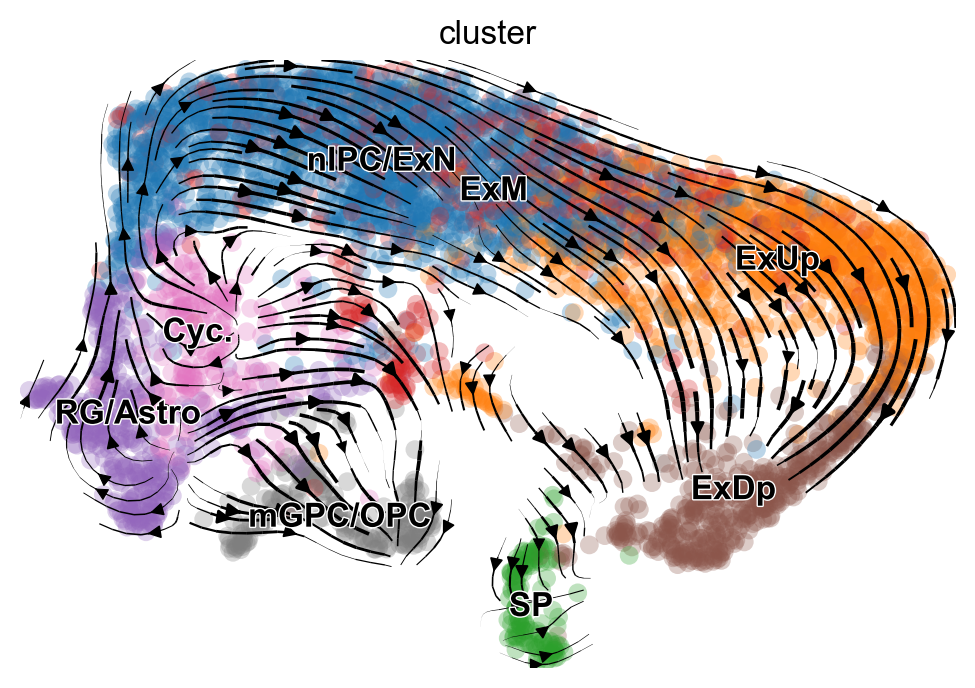

In [11]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='cluster', show=True)

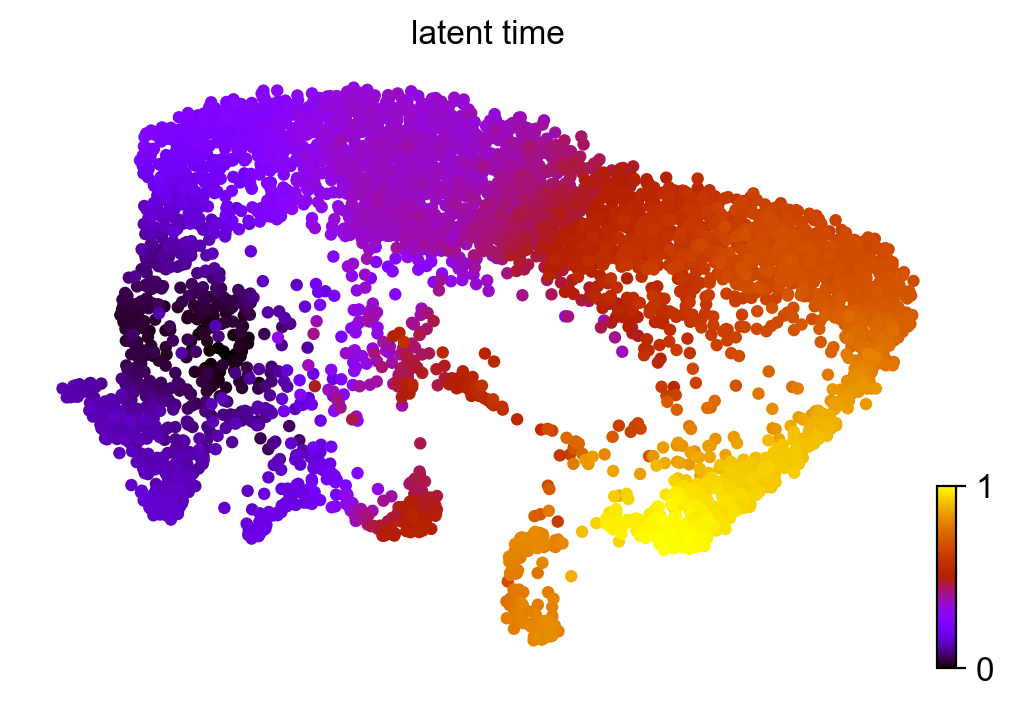

In [12]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80)

## Fig 6b

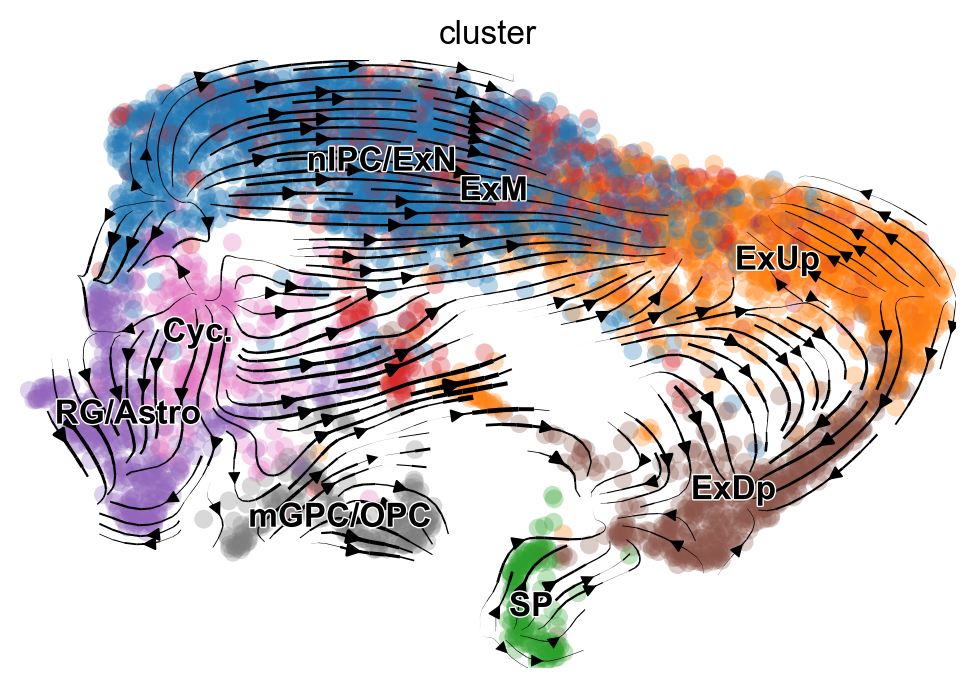

In [13]:
scv.pl.velocity_embedding_stream(adata_result, basis='umap', color='cluster')

## Fig 6c

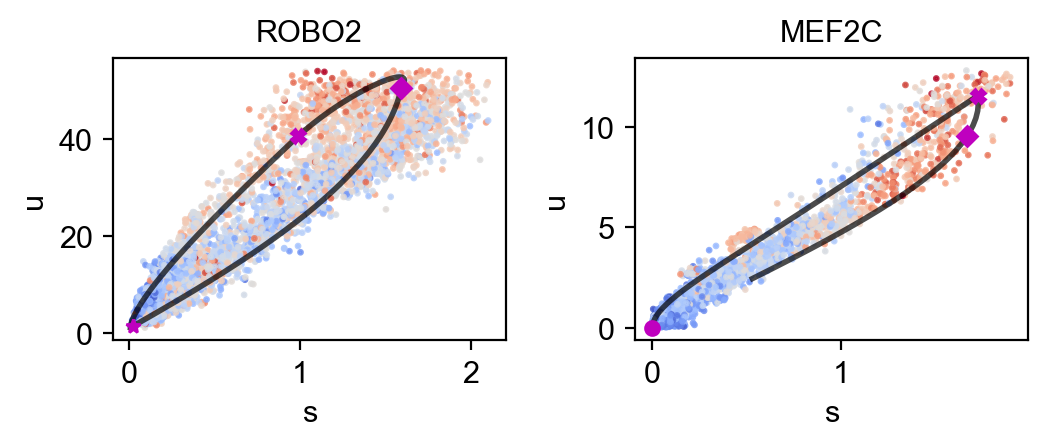

In [14]:
gene_list = ["ROBO2", "MEF2C"]
mv.scatter_plot(adata_result, color_by='c', genes=gene_list)

## Fig 6d

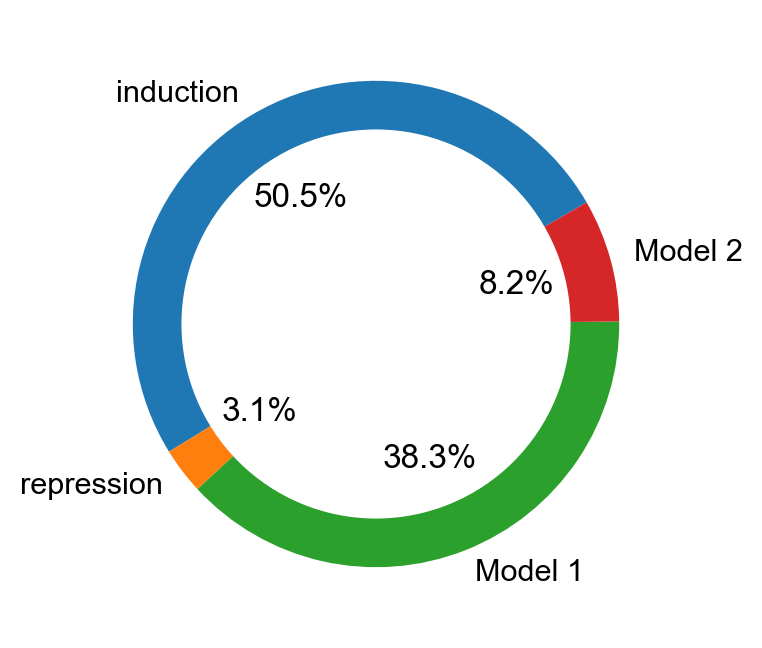

In [15]:
mv.pie_summary(adata_result)